In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']

feat_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country']
train_set.columns = col_labels
test_set.columns = col_labels

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233766C1080>,
      dtype=object)

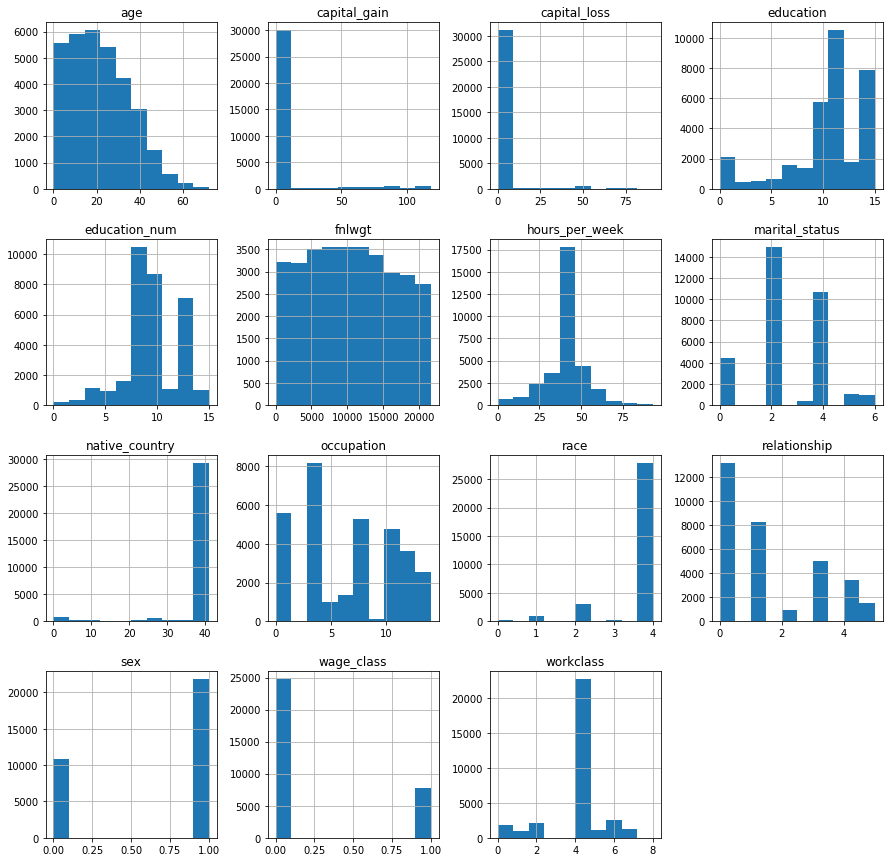

In [57]:
train_set.hist(figsize=(15,15))

In [4]:
from pandas import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023377E3CBE0>,
      dtype=object)

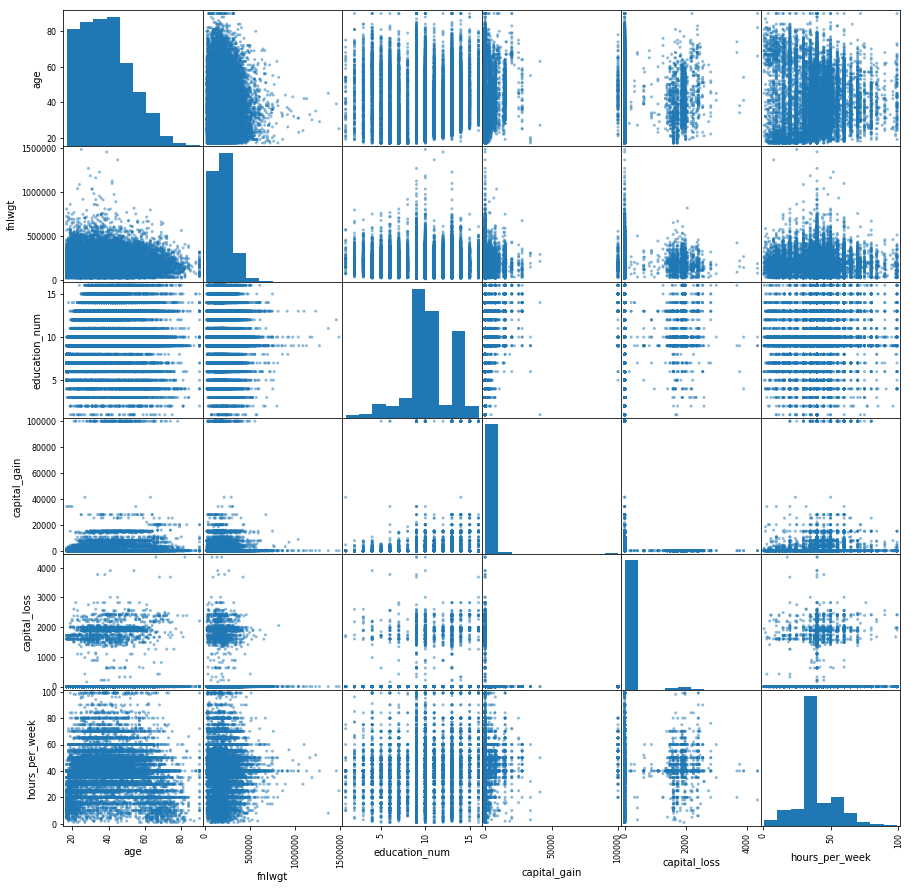

In [5]:
pd.plotting.scatter_matrix(train_set, figsize=(15,15))

In [6]:
LE = LabelEncoder()
for l in train_set.columns:
    train_set[l] = LE.fit_transform(train_set[l])

for l in test_set.columns:
    test_set[l] = LE.fit_transform(test_set[l])

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int32
fnlwgt            32561 non-null int64
education         32561 non-null int32
education_num     32561 non-null int64
marital_status    32561 non-null int32
occupation        32561 non-null int32
relationship      32561 non-null int32
race              32561 non-null int32
sex               32561 non-null int32
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int32
wage_class        32561 non-null int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null int32
fnlwgt            16281 non-null int64
education         16281 non-null int32
education_num     16281 non-null int64
marital_status    16281 non-null int32
occupation        16281 non-null int32
relationship      16281 non-null int32
race              16281 non-null int32
sex               16281 non-null int32
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null int32
wage_class        16281 non-null int32
dtypes: int32(9), int64(6)
memory usage: 1.3 MB


In [9]:
X_train = train_set.drop(['wage_class'], axis=1)
y_train = train_set['wage_class']
X_test = test_set.drop(['wage_class'], axis=1)
y_test = test_set['wage_class']

In [10]:
clf = LogisticRegression()

In [11]:
clf.fit(X_train, y_train)

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
correct = 0
for i in range(len(y_pred)):
    if (y_test[i] == y_pred[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(y_pred)))

Predicted correctly 13160/16281


In [14]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy score is  0.8083041582212395


In [15]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[11526   909]
 [ 2212  1634]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     12435
           1       0.64      0.42      0.51      3846

   micro avg       0.81      0.81      0.81     16281
   macro avg       0.74      0.68      0.70     16281
weighted avg       0.79      0.81      0.79     16281



In [16]:
tree = DecisionTreeClassifier(max_depth=10)

In [17]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
tree_pred = tree.predict(X_test)

In [19]:
correct = 0
for i in range(len(tree_pred)):
    if (y_test[i] == tree_pred[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(tree_pred)))

Predicted correctly 13822/16281


In [20]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=tree_pred))

Accuracy score is  0.848965051286776


In [21]:
print(metrics.confusion_matrix(y_test, tree_pred))
print(metrics.classification_report(y_test, tree_pred))

[[11715   720]
 [ 1739  2107]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     12435
           1       0.75      0.55      0.63      3846

   micro avg       0.85      0.85      0.85     16281
   macro avg       0.81      0.74      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [22]:
xgb_model  = xgb.XGBClassifier(n_estimators=300, objective='binary:logistic',
                    silent=True, nthread=1)

In [23]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
prediction = xgb_model.predict(X_test)

In [25]:
correct = 0
for i in range(len(prediction)):
    if (y_test[i] == prediction[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(prediction)))

Predicted correctly 14035/16281


In [26]:
acc = accuracy_score(y_test,prediction)
print('Accuracy score is',format(acc))
print('Error: {0:.4f}'.format(1-acc))

Accuracy score is 0.8620477857625453
Error: 0.1380


In [27]:
random = RandomForestClassifier(n_estimators=400)

In [28]:
random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
y_pred = random.predict(X_test)

In [30]:
correct = 0
for i in range(len(y_pred)):
    if (y_test[i] == y_pred[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(y_pred)))

Predicted correctly 13841/16281


In [31]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy score is  0.8501320557705301


In [32]:
sfm = SelectFromModel(xgb_model)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [33]:
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
fnlwgt
education_num
occupation
capital_gain
capital_loss
hours_per_week


In [ ]:
# Above factors are the most important factors in this dataset

In [ ]:
# Predictions were done based on 4 different algorithms and their accuracy scores are mentioned below
#   1. Logistic Regression - 80.83%
#   2. Decision Tree Classifier - 84.89%
#   3. XGB Classifier - 86.2%
#   4. Random Forest Classifier - 85.01%
# Based on the accuracy score it can be concluded that the best algorithm for this dataset is XGB Classifier

In [34]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [35]:
clf.fit(X_important_train, y_train)

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
y_pred = clf.predict(X_important_test)

In [37]:
correct = 0
for i in range(len(y_pred)):
    if (y_test[i] == y_pred[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(y_pred)))

Predicted correctly 12942/16281


In [38]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy score is  0.794914317302377


In [39]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[11827   608]
 [ 2731  1115]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     12435
           1       0.65      0.29      0.40      3846

   micro avg       0.79      0.79      0.79     16281
   macro avg       0.73      0.62      0.64     16281
weighted avg       0.77      0.79      0.76     16281



In [40]:
tree.fit(X_important_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
tree_pred = tree.predict(X_important_test)

In [42]:
correct = 0
for i in range(len(tree_pred)):
    if (y_test[i] == tree_pred[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(tree_pred)))

Predicted correctly 13230/16281


In [43]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=tree_pred))

Accuracy score is  0.8126036484245439


In [44]:
print(metrics.confusion_matrix(y_test, tree_pred))
print(metrics.classification_report(y_test, tree_pred))

[[11789   646]
 [ 2405  1441]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     12435
           1       0.69      0.37      0.49      3846

   micro avg       0.81      0.81      0.81     16281
   macro avg       0.76      0.66      0.69     16281
weighted avg       0.80      0.81      0.79     16281



In [45]:
xgb_model.fit(X_important_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [46]:
prediction = xgb_model.predict(X_important_test)

In [47]:
correct = 0
for i in range(len(prediction)):
    if (y_test[i] == prediction[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(prediction)))

Predicted correctly 13338/16281


In [48]:
acc = accuracy_score(y_test,prediction)
print('Accuracy score is',format(acc))
print('Error: {0:.4f}'.format(1-acc))

Accuracy score is 0.8192371475953566
Error: 0.1808


In [49]:
random.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
prediction = random.predict(X_important_test)

In [51]:
correct = 0
for i in range(len(y_pred)):
    if (y_test[i] == y_pred[i]):
        correct += 1
    
print('Predicted correctly {0}/{1}'.format(correct, len(y_pred)))

Predicted correctly 12942/16281


In [52]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy score is  0.794914317302377


In [53]:
tree.fit(X_important_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
tree_pred = tree.predict(X_important_test)

In [55]:
print('Accuracy score is ', accuracy_score(y_true=y_test, y_pred=tree_pred))

Accuracy score is  0.8124808058473066


In [56]:
print(metrics.confusion_matrix(y_test, tree_pred))
print(metrics.classification_report(y_test, tree_pred))

[[11792   643]
 [ 2410  1436]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     12435
           1       0.69      0.37      0.48      3846

   micro avg       0.81      0.81      0.81     16281
   macro avg       0.76      0.66      0.69     16281
weighted avg       0.80      0.81      0.79     16281



In [ ]:
# Predictions were done based on 4 different algorithms with only the important factors and the accuracy scores 
# are mentioned below
#   1. Logistic Regression - 79.49%
#   2. Decision Tree Classifier - 81.26%
#   3. XGB Classifier - 81.92%
#   4. Random Forest Classifier - 79.49%
# Based on the accuracy score it can be concluded that the best algorithm for this dataset is XGB Classifier